In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn import preprocessing
import statsmodels.api as sm
import itertools

In [32]:
df=pd.read_csv("DailyDelhi.csv")

In [34]:
df.head(114)

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2017,15.913043,85.869565,2.743478,59.000000
1,02-01-2017,18.500000,77.222222,2.894444,1018.277778
2,03-01-2017,17.111111,81.888889,4.016667,1018.333333
3,04-01-2017,18.700000,70.050000,4.545000,1015.700000
4,05-01-2017,18.388889,74.944444,3.300000,1014.333333
5,06-01-2017,19.318182,79.318182,8.681818,1011.772727
6,07-01-2017,14.708333,95.833333,10.041667,1011.375000
7,08-01-2017,15.684211,83.526316,1.950000,1015.550000
8,09-01-2017,14.571429,80.809524,6.542857,1015.952381
9,10-01-2017,12.111111,71.944444,9.361111,1016.888889


In [35]:
df.tail(10)

,date,meantemp,humidity,wind_speed,meanpressure
104,15-04-2017,31.222222,30.444444,5.966667,1002.444444
105,16-04-2017,31.000000,34.250000,2.100000,1003.250000
106,17-04-2017,32.555556,38.444444,5.366667,1004.444444
107,18-04-2017,34.000000,27.333333,7.811111,1003.111111
108,19-04-2017,33.500000,24.125000,9.025000,1000.875000
109,20-04-2017,34.500000,27.500000,5.562500,998.625000
110,21-04-2017,34.250000,39.375000,6.962500,999.875000
111,22-04-2017,32.900000,40.900000,8.890000,1001.600000
112,23-04-2017,32.875000,27.500000,9.962500,1002.125000
113,24-04-2017,32.000000,27.142857,12.157143,1004.142857


In [36]:
df.shape

(114, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [38]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [39]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,date,meantemp,humidity,wind_speed,meanpressure


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [41]:
df['date']=pd.to_datetime(df['date'])

C:\Users\phili\AppData\Local\Temp\ipykernel_17372\1213281828.py:1: UserWarning: Parsing '13-01-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date']=pd.to_datetime(df['date'])
C:\Users\phili\AppData\Local\Temp\ipykernel_17372\1213281828.py:1: UserWarning: Parsing '14-01-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date']=pd.to_datetime(df['date'])
C:\Users\phili\AppData\Local\Temp\ipykernel_17372\1213281828.py:1: UserWarning: Parsing '15-01-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date']=pd.to_datetime(df['date'])
C:\Users\phili\AppData\Local\Temp\ipykernel_17372\1213281828.py:1: UserWarning: Parsing '16-01-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date']=pd.to_datetime(df['date'])
C:\Users\phili\AppData\Local\Temp\ipyker

In [42]:
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=114, freq=None)

In [43]:
df.groupby(df.index.year).describe().transpose()

date                       2017
meantemp     count   114.000000
             mean     21.713079
             std       6.360072
             min      11.000000
             25%      16.437198
             50%      19.875000
             75%      27.705357
             max      34.500000
humidity     count   114.000000
             mean     56.258362
             std      19.068083
             min      17.750000
             25%      39.625000
             50%      57.750000
             75%      71.902778
             max      95.833333
wind_speed   count   114.000000
             mean      8.143924
             std       3.588049
             min       1.387500
             25%       5.563542
             50%       8.069444
             75%      10.068750
             max      19.314286
meanpressure count   114.000000
             mean   1004.035090
             std      89.474692
             min      59.000000
             25%    1007.437500
             50%    1012.739317
             75%    1016.739583
             max    1022.809524

In [44]:
df['year'] = df.index.year

In [45]:
df['month'] = df.index.month

In [46]:
df['day'] = df.index.day

In [47]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day
date,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,1
2017-02-01,18.500000,77.222222,2.894444,1018.277778,2017,2,1
2017-03-01,17.111111,81.888889,4.016667,1018.333333,2017,3,1
2017-04-01,18.700000,70.050000,4.545000,1015.700000,2017,4,1
2017-05-01,18.388889,74.944444,3.300000,1014.333333,2017,5,1


In [48]:
# visualization

In [49]:
col =['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [50]:
df = df[col]

In [51]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-02-01,18.500000,77.222222,2.894444,1018.277778
2017-03-01,17.111111,81.888889,4.016667,1018.333333
2017-04-01,18.700000,70.050000,4.545000,1015.700000
2017-05-01,18.388889,74.944444,3.300000,1014.333333
2017-06-01,19.318182,79.318182,8.681818,1011.772727
2017-07-01,14.708333,95.833333,10.041667,1011.375000
2017-08-01,15.684211,83.526316,1.950000,1015.550000
2017-09-01,14.571429,80.809524,6.542857,1015.952381


In [52]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

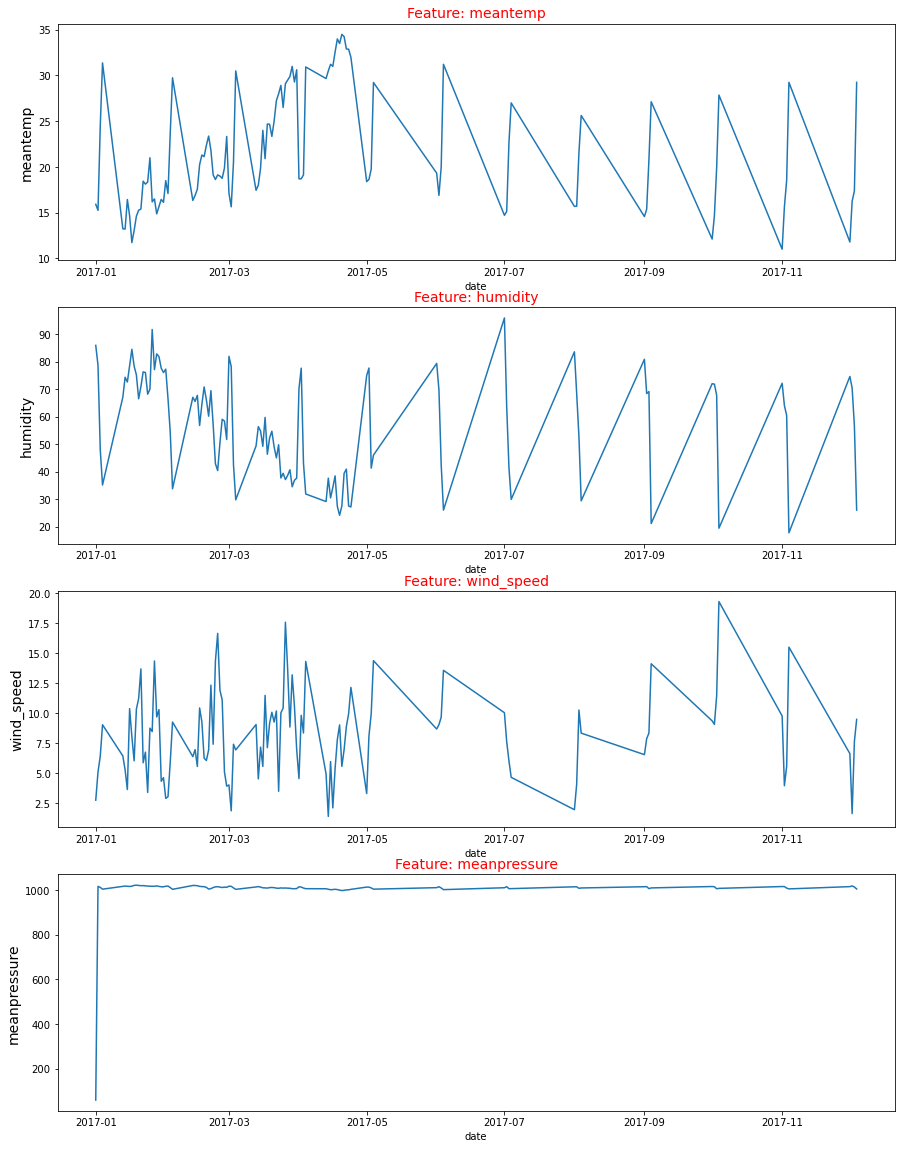

In [53]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

for i, column in enumerate(df.columns):
    sns.lineplot(x=df.index, y=df[column],ax=ax[i])
    ax[i].set_title('Feature: {}'.format(column), fontsize=14, color = 'Red')
    ax[i].set_ylabel(ylabel=column, fontsize=14)

In [54]:
y=df["meantemp"].resample('D').mean()
y.head(10)

date
2017-01-01    15.913043
2017-01-02    15.250000
2017-01-03    24.461538
2017-01-04    31.375000
2017-01-05          NaN
2017-01-06          NaN
2017-01-07          NaN
2017-01-08          NaN
2017-01-09          NaN
2017-01-10          NaN
Freq: D, Name: meantemp, dtype: float64

In [55]:
y.isnull().sum()

224

In [56]:
y.fillna(method="bfill",inplace=True)

In [57]:
y.isnull().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

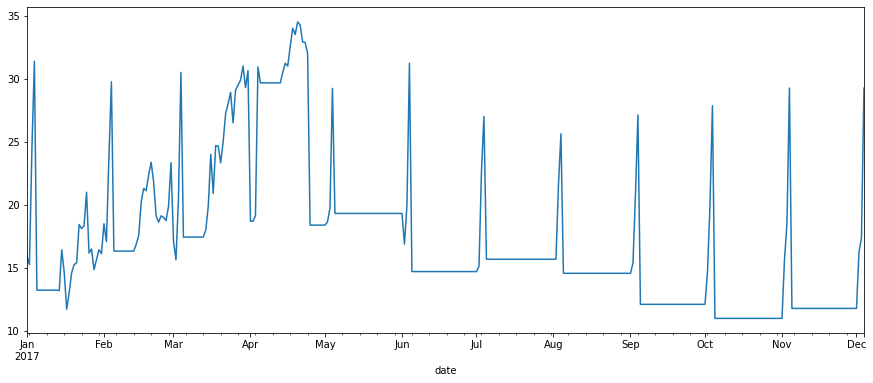

In [58]:
y.plot(figsize=(15,6))
plt.show

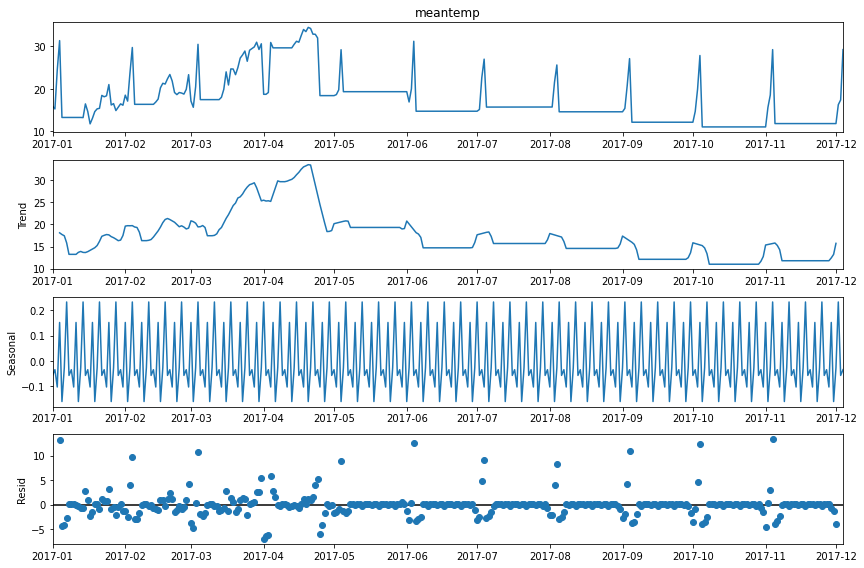

In [59]:
from pylab import rcParams

rcParams["figure.figsize"] = 12,8

decomposition = sm.tsa.seasonal_decompose(y,model = "addictive")

fig = decomposition.plot()

plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
from pandas import Series
result=adfuller(y)
print('ADF Statistic: %f' % result[0])
print('P-value: %f' % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -3.269273
P-value: 0.016309
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


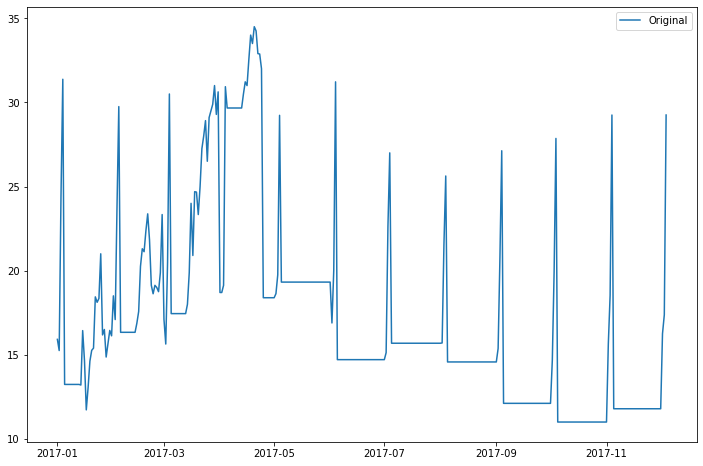

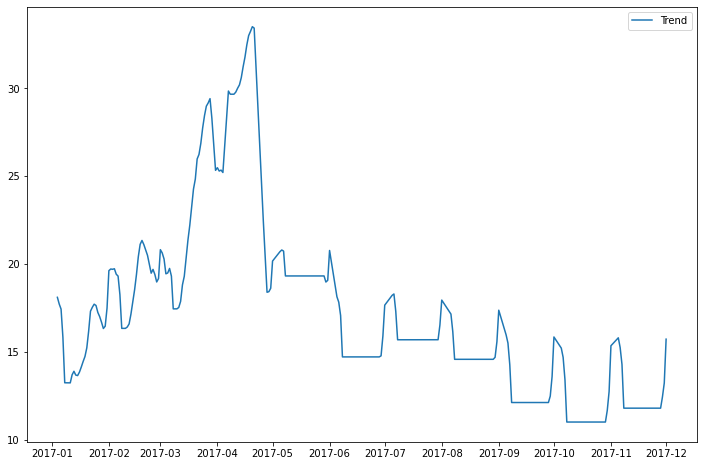

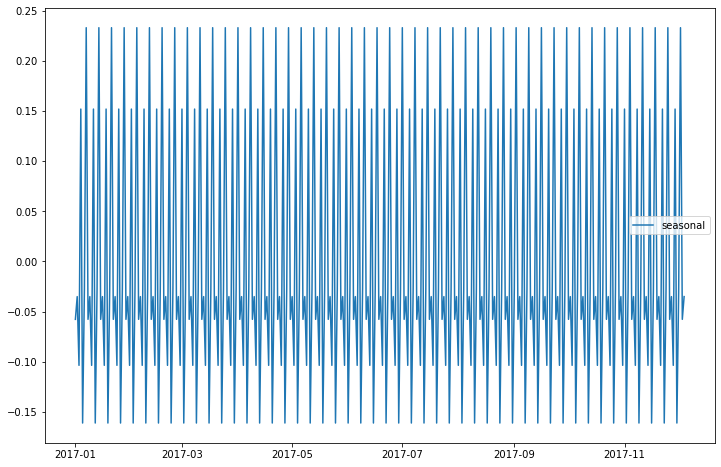

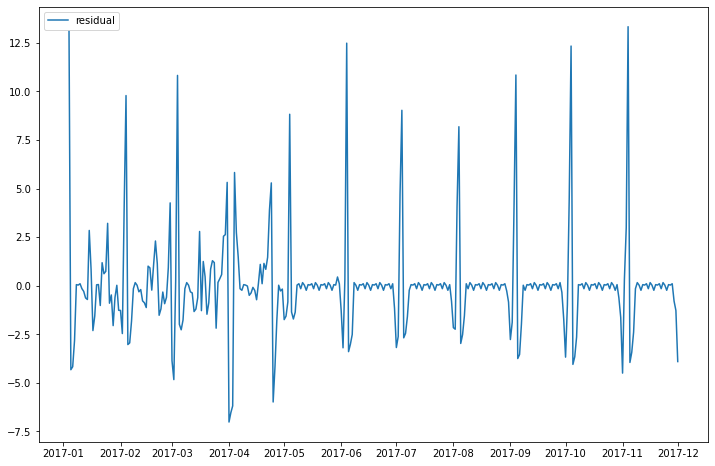

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y,label = "Original")
plt.legend(loc = "best")

trend = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = "seasonal")
plt.legend(loc = "best")

residual = decomposition.resid
plt.show()
plt.plot(residual, label = "residual")
plt.legend(loc = "best")


In [64]:
# ARIMA.

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12)for x in list(itertools.product(p,d,q))]
print("Examples of parameter combinations for seasonal ARIMA...")
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[2]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[3]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 0, 1) x (0, 1, 1, 12)
SARIMA: (0, 0, 1) x (1, 0, 0, 12)


In [65]:
p

range(0, 2)

In [66]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
seasonal_order=param_seasonal,                                          
enforce_stationarity = False,
enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - ATC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - ATC:2914.6641763034318
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - ATC:2528.866571174674
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - ATC:2002.7473047377762
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - ATC:1876.5094501903006
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - ATC:2002.1365112982503
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - ATC:1954.2674257873523
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - ATC:1888.0294493764086
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - ATC:1875.8535341749216
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - ATC:2537.832669711621
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - ATC:2253.2121003780803
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - ATC:1889.7843735190736
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - ATC:1746.8915728097872
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - ATC:1890.2184048235586
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - ATC:1819.3791600324373
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - ATC:1771.570620909311
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - ATC:1744.0842526369788
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - ATC:1787.1406317043188
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - ATC:1696.787453899

In [67]:
df=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results=df.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4884      0.060      8.153      0.000       0.371       0.606
ma.L1         -1.1639      0.063    -18.522      0.000      -1.287      -1.041
ar.S.L12       0.0175      0.098      0.179      0.858      -0.174       0.209
ma.S.L12      -0.9004      0.066    -13.597      0.000      -1.030      -0.771
sigma2         7.8725      0.886      8.883      0.000       6.135       9.610


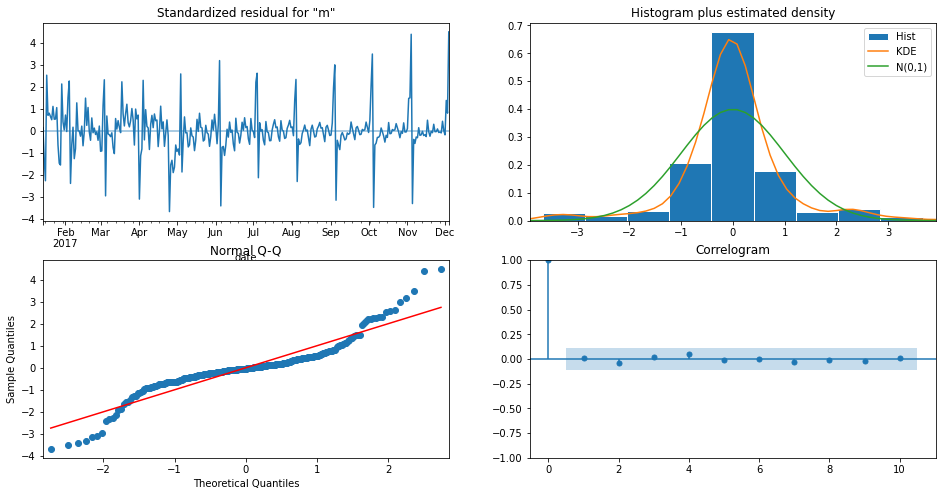

In [68]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

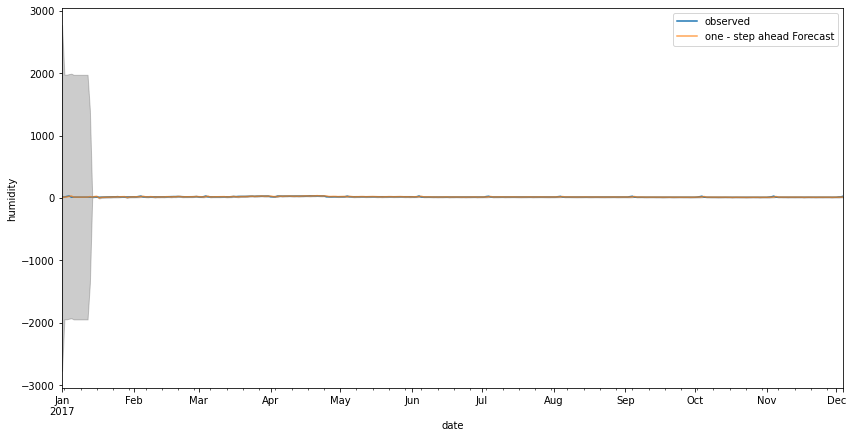

In [72]:
pred = results.get_prediction(start = pd.to_datetime("2017-01-01"),dynamis=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label = "observed")
pred.predicted_mean.plot(ax=ax,label="one - step ahead Forecast",alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.2)
ax.set_xlabel("date")
ax.set_ylabel("humidity")
plt.legend()
plt.show()